# WeatherPy


Observations:
1. In the Northern Hemisphere, the higher the latitude shows a negative coorleation to the temperature. This makes sense as the closer you get to the north pole, the colder it gets. Since the southern hemisphere has negative values, there is a positive coorleation between the two, although it is not as strong as it is in the north. 

2. Humidity, cloudiness and wind speed did not display a coorelation to the latitude values. This suggests that these factors are not very location dependent. 

3. The number of values for the Northern Hemisphere from this particular data request was 381 and for the Southern one it was only 177. This makes the southern data more limited for drawing conclutions. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV) - ASK GRETEL THIS 
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build a URL for the OWM API, include a units variable and your API Key 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create the variables needed for the data you are interested in
cities = cities

counter = 0
temp = []
lat = []
lon = []
hum = []
cloud = []
wind = []
city_list = []
date =[]
country = []

# Make a loop for each city you will be looking for, appened your empty list for the info you will gather
# Make sure to include an expection for pulled cities that might not show up from CityPy to OWM

for city in cities:
    response = requests.get(query_url + city).json()  
    counter += 1
    
    try:
        city_list.append(city)
        date.append(response['dt'])
        country.append(response['sys']['country'])
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f"Processing request for: {counter}, {city}")

    except (KeyError):
        city_list.remove(city)
        print("Missing field/result... skipping.")
        pass

Processing request for: 1, gornopravdinsk
Processing request for: 2, tiznit
Missing field/result... skipping.
Processing request for: 4, thompson
Processing request for: 5, hermanus
Processing request for: 6, west wendover
Processing request for: 7, butaritari
Processing request for: 8, east london
Processing request for: 9, bluff
Processing request for: 10, vaini
Missing field/result... skipping.
Processing request for: 12, port elizabeth
Processing request for: 13, albany
Processing request for: 14, barrow
Processing request for: 15, hofn
Processing request for: 16, new norfolk
Processing request for: 17, ahipara
Processing request for: 18, anadyr
Processing request for: 19, kodiak
Processing request for: 20, punta arenas
Processing request for: 21, witu
Processing request for: 22, eyl
Processing request for: 23, mao
Processing request for: 24, mataura
Processing request for: 25, naze
Processing request for: 26, lompoc
Processing request for: 27, puerto ayora
Processing request for: 

Processing request for: 223, cockburn town
Processing request for: 224, oistins
Processing request for: 225, missoula
Processing request for: 226, narsaq
Processing request for: 227, pavilosta
Processing request for: 228, adrar
Processing request for: 229, grants pass
Processing request for: 230, palmer
Processing request for: 231, taoudenni
Processing request for: 232, bahia de caraquez
Processing request for: 233, fortuna
Processing request for: 234, vega de alatorre
Processing request for: 235, fairbanks
Processing request for: 236, mnogovershinnyy
Processing request for: 237, trelew
Processing request for: 238, noumea
Processing request for: 239, havoysund
Processing request for: 240, ondjiva
Processing request for: 241, oktyabrskoye
Processing request for: 242, mahajanga
Processing request for: 243, byron bay
Processing request for: 244, matane
Processing request for: 245, gizo
Processing request for: 246, puerto cabello
Processing request for: 247, norman wells
Processing request

Missing field/result... skipping.
Processing request for: 441, chippewa falls
Processing request for: 442, tautira
Processing request for: 443, segezha
Processing request for: 444, hovd
Processing request for: 445, provideniya
Processing request for: 446, acapulco
Processing request for: 447, barillas
Processing request for: 448, labrea
Processing request for: 449, camapua
Processing request for: 450, bo phloi
Missing field/result... skipping.
Processing request for: 452, alyangula
Processing request for: 453, esperance
Processing request for: 454, xining
Processing request for: 455, atbasar
Processing request for: 456, zelenoborskiy
Processing request for: 457, dwarka
Processing request for: 458, sorland
Processing request for: 459, kidal
Processing request for: 460, half moon bay
Processing request for: 461, mantua
Processing request for: 462, fort-shevchenko
Processing request for: 463, sao filipe
Processing request for: 464, kysyl-syr
Processing request for: 465, evensk
Processing 

In [4]:
# Making sure all the columns have an even amount of data to avoid future errors
print(len(city_list), len(date), len(country), len(temp), len(lat), len(lon), len(hum), len(cloud), len(wind))

558 558 558 558 558 558 558 558 558


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# New DataFrame that will hold all the requests from the API 
weather_dict = {
    "city": city_list,
    "country":country,
    "date": date,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "hum": hum,
    "clouds": cloud,
    "wind": wind
    
}
city_data = pd.DataFrame(weather_dict)
city_data.head()

city country        date    lat     lon   temp  hum  clouds  \
0  gornopravdinsk      RU  1586629500  60.05   69.90  35.87   87       0   
1          tiznit      MA  1586629201  29.58   -9.50  62.62   60     100   
2        thompson      CA  1586629501  55.74  -97.86  26.60   68      90   
3        hermanus      ZA  1586629501 -34.42   19.23  67.75   76     100   
4   west wendover      US  1586629501  40.74 -114.07  66.20   24       1   

    wind  
0   6.51  
1   7.76  
2   5.82  
3   3.00  
4  16.11

In [6]:
# Output to a CSV file so you don't have to make multiple requests from the API 
city_data.to_csv("../output_data/city_data.csv")

In [7]:
# CSV file ready to be read and random column deleted 
city_df = pd.read_csv("../output_data/city_data.csv")
city_df.keys()
del city_df['Unnamed: 0']
city_df["date"] = pd.to_datetime(city_df['date'], unit='s')
city_df.head()

city country                date    lat     lon   temp  hum  \
0  gornopravdinsk      RU 2020-04-11 18:25:00  60.05   69.90  35.87   87   
1          tiznit      MA 2020-04-11 18:20:01  29.58   -9.50  62.62   60   
2        thompson      CA 2020-04-11 18:25:01  55.74  -97.86  26.60   68   
3        hermanus      ZA 2020-04-11 18:25:01 -34.42   19.23  67.75   76   
4   west wendover      US 2020-04-11 18:25:01  40.74 -114.07  66.20   24   

   clouds   wind  
0       0   6.51  
1     100   7.76  
2      90   5.82  
3     100   3.00  
4       1  16.11

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

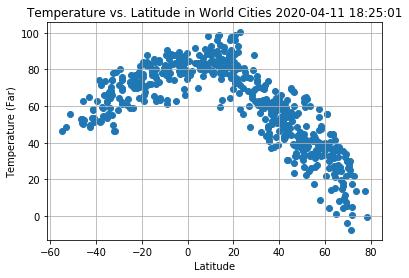

In [32]:
# Scatter Plots 
date = city_df.iloc[3,2]

plt.scatter(city_df["lat"], city_df["temp"], marker="o")

# Incorporate the other graph properties 
plt.title(f'Temperature vs. Latitude in World Cities' + " " + str(date) )
plt.ylabel("Temperature (Far)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1: Lat vs. Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

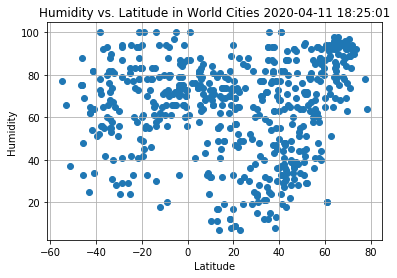

In [29]:
plt.scatter(city_df["lat"], city_df["hum"], marker="o")

# Humidity Plot 
plt.title("Humidity vs. Latitude in World Cities" + " " + str(date))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2: Lat vs. Hum.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

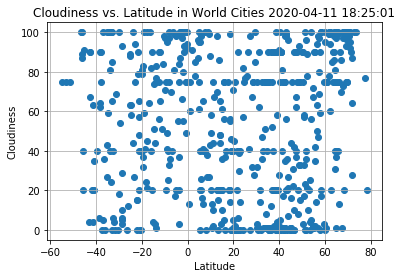

In [30]:
plt.scatter(city_df["lat"], city_df["clouds"], marker="o")

# Cloudiness Scatter Plot 
plt.title("Cloudiness vs. Latitude in World Cities" +  " " + str(date))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3: Lat vs. Clouds.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

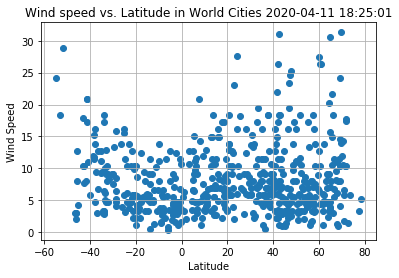

In [31]:
plt.scatter(city_df["lat"], city_df["wind"], marker="o")

# Wind speed scatter plot 
plt.title("Wind speed vs. Latitude in World Cities" +  " " + str(date))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4: Lat vs. Wind.png")

# Show plot
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression (x_axis, y_axis, title, xlabel, ylabel):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.tight_layout()
    plt.show()
    
    print(f"The r-squared is: {rvalue**2}")

    return 

In [13]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_df.loc[city_df["lat"] >=0]
north_df

city country                date    lat     lon   temp  hum  \
0    gornopravdinsk      RU 2020-04-11 18:25:00  60.05   69.90  35.87   87   
1            tiznit      MA 2020-04-11 18:20:01  29.58   -9.50  62.62   60   
2          thompson      CA 2020-04-11 18:25:01  55.74  -97.86  26.60   68   
4     west wendover      US 2020-04-11 18:25:01  40.74 -114.07  66.20   24   
5        butaritari      KI 2020-04-11 18:25:01   3.07  172.79  83.77   76   
..              ...     ...                 ...    ...     ...    ...  ...   
553          mizdah      LY 2020-04-11 18:25:39  31.45   12.98  62.80   42   
554      hambantota      LK 2020-04-11 18:25:39   6.12   81.12  82.18   79   
555       kyzyl-suu      KG 2020-04-11 18:25:39  42.34   78.00  45.00   30   
556          xingyi      CN 2020-04-11 18:25:39  24.19  102.82  55.80   49   
557            emba      KZ 2020-04-11 18:25:39  48.83   58.14  44.51   53   

     clouds   wind  
0         0   6.51  
1       100   7.76  
2        90   5.82  
4         1  16.11  
5        78  12.77  
..      ...    ...  
553      14  13.76  
554      16  11.61  
555      98   3.20  
556      57   6.04  
557      33   9.80  

[381 rows x 9 columns]

In [14]:
south_df = city_df.loc[city_df["lat"] <=0]
south_df

city country                date    lat     lon   temp  hum  \
3          hermanus      ZA 2020-04-11 18:25:01 -34.42   19.23  67.75   76   
6       east london      ZA 2020-04-11 18:24:27 -33.02   27.91  74.05   74   
7             bluff      NZ 2020-04-11 18:25:01 -46.60  168.33  53.01   75   
8             vaini      TO 2020-04-11 18:25:01 -21.20 -175.20  64.40   93   
9    port elizabeth      ZA 2020-04-11 18:25:02 -33.92   25.57  59.00   72   
..              ...     ...                 ...    ...     ...    ...  ...   
541    san jeronimo      PE 2020-04-11 18:25:38 -11.95  -75.28  63.32   18   
546           dubbo      AU 2020-04-11 18:25:38 -32.25  148.62  46.40   81   
547     warrnambool      AU 2020-04-11 18:25:38 -38.38  142.48  52.00   78   
548      cavalcante      BR 2020-04-11 18:25:38 -13.80  -47.46  80.26   56   
549     lichtenburg      ZA 2020-04-11 18:25:04 -26.15   26.16  63.68   29   

     clouds   wind  
3       100   3.00  
6       100  12.88  
7       100   3.00  
8        20   2.24  
9       100   3.36  
..      ...    ...  
541      65   6.62  
546       4   9.17  
547      62  15.30  
548      83   4.68  
549      12   3.87  

[177 rows x 9 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

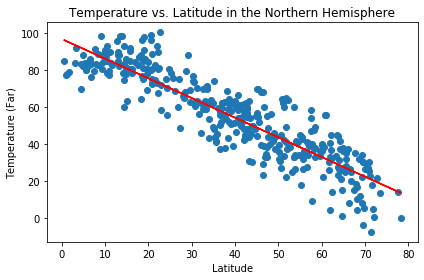

The r-squared is: 0.8071461179267692


In [34]:
regression(north_df["lat"], north_df["temp"],"Temperature vs. Latitude in the Northern Hemisphere","Latitude","Temperature (Far)")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

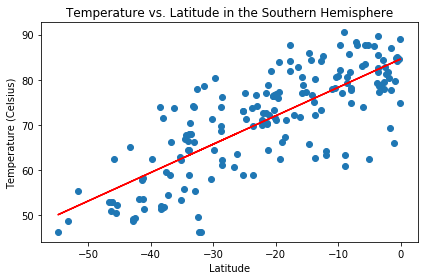

The r-squared is: 0.6027798113987841


In [16]:
regression(south_df["lat"], south_df["temp"],"Temperature vs. Latitude in the Southern Hemisphere","Latitude","Temperature (Celsius)")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

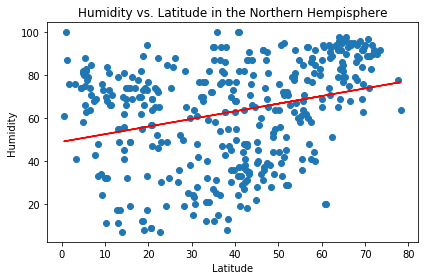

The r-squared is: 0.0848140833703218


In [17]:
regression(north_df["lat"], north_df["hum"],"Humidity vs. Latitude in the Northern Hempisphere", "Latitude", "Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

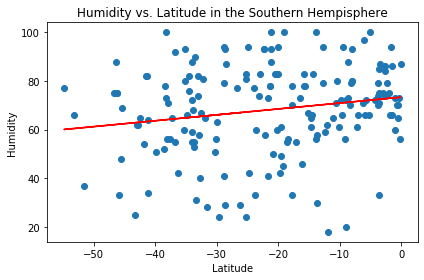

The r-squared is: 0.033161616676625566


In [18]:
regression(south_df["lat"], south_df["hum"],"Humidity vs. Latitude in the Southern Hempisphere", "Latitude", "Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

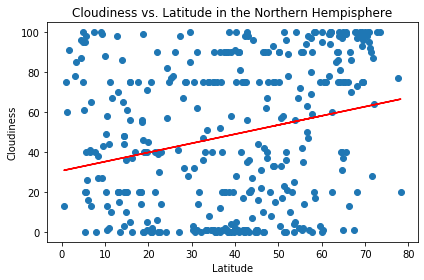

The r-squared is: 0.061774182000621396


In [19]:
regression(north_df["lat"], north_df["clouds"],"Cloudiness vs. Latitude in the Northern Hempisphere", "Latitude", "Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

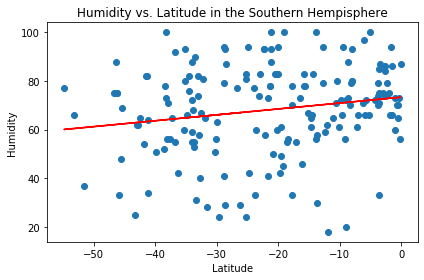

The r-squared is: 0.033161616676625566


In [20]:
regression(south_df["lat"], south_df["hum"],"Humidity vs. Latitude in the Southern Hempisphere", "Latitude", "Humidity")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

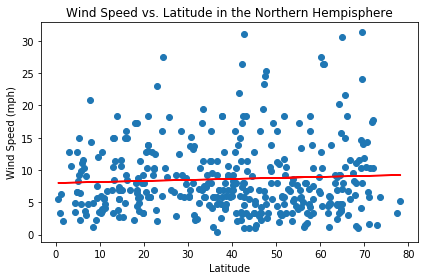

The r-squared is: 0.002994575549146532


In [21]:
regression(north_df["lat"], north_df["wind"],"Wind Speed vs. Latitude in the Northern Hempisphere", "Latitude", "Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

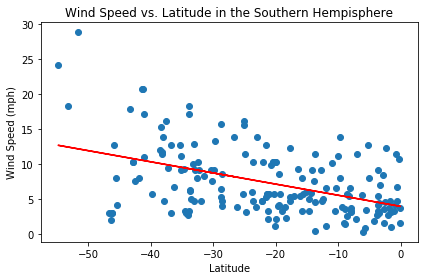

The r-squared is: 0.2103629986134329


In [22]:
regression(south_df["lat"], south_df["wind"],"Wind Speed vs. Latitude in the Southern Hempisphere", "Latitude", "Wind Speed (mph)")